# SCIKIT-LEARN
[Official documentation](https://scikit-learn.org/stable/)

***
 

In [10]:
##  Alt + Enter - Insert cell below

# Skikit-learn Machine Learning module
import sklearn as sk

# Efficient numerical arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Working with DataFrames
import pandas as pd

# Disabling false positive warning
#https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

# Part 1 - Overview of the Scikit-learn library

## Scikit-learn

Scikit-learn is a Python machine learning library.
Machine Learning, in general, is given a set of n samples of data and then tries to predict properties of unknown data. [1](#section)

Sometimes, data has to be prepared, "cleaned", and divided into "features data" and "target data". Then it is further divided into train set and test set. After that it is ready to go into prediction model. Once prediction is done, its accuracy can be tested by comparing it with the test set. [2](#section)

Scikit-learn supports and iteroperates with NumPy and SciPy for numerical operations, as well as with Matplotlib for plotting and Pandas for data manipulation.

Three main techniques of Machine Learning can be highlighted - classification, regression and clustering. [3](#section) 

### 2. Regression

Regression is a type of supervised learning problem where the machine tries to predict a continuous data based on certain inputs. For example, predicting price of a house given the area & no. of rooms as input.  [4](#section)

Other possible applications can be drug response or stock prices prediction algorithm.
Some of the algorithms are linear regression, nearest neighbors or random forest.

### 3. Clustering

Automatic grouping of similar objects into sets.
Possible applications can be customer segmentation or grouping experiment outcome.
Some of the algorithms are k-Means or spectral clustering.

# Part 2 - Demonstrations of three scikit-learn algorithms.

## Algorithm 1 - <span style="color:red">*Logistic regression*</span>

Despite its name, logistic regression is a linear model for <b>classification</b> rather than regression.  [5](#section)

It gives the probabilistic output of dependent categorical value based on certain independent variables.
Logistic regression uses the logistic function to calculate probability.
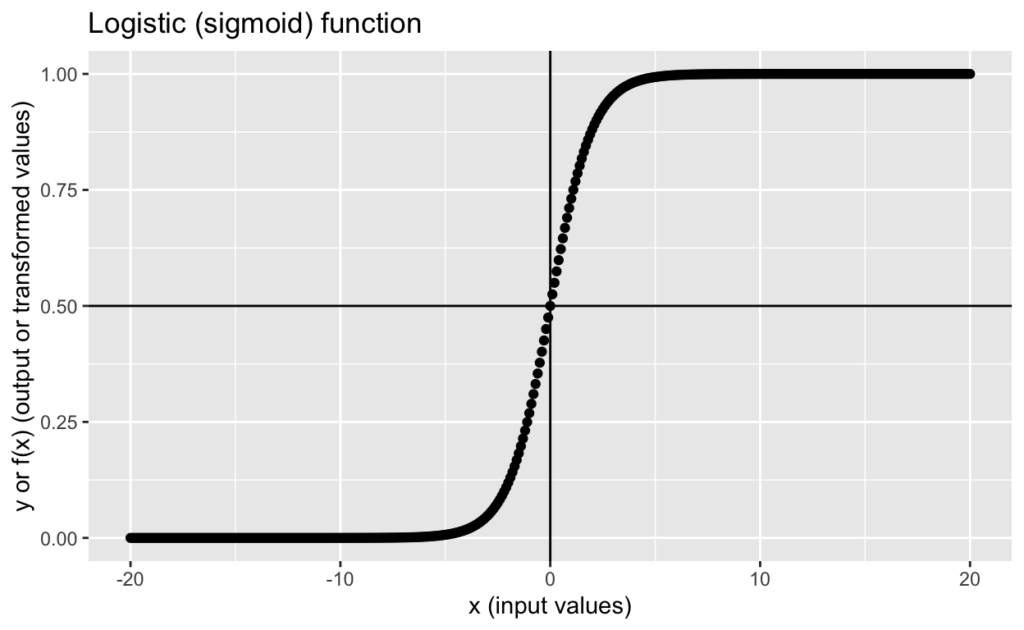
Usually, for doing binary classification with logistic regression, we decide on a threshold value of probability above which the output is considered as 0.
Thus, probability outcome y = 0.80 will be treated as a positive class(i.e. 1) and y = 0.3 as the negative class(i.e.=0). [6](#section)



We are going to be using iris dataset to test logistic regression in work. The data set is available online.
Let us load the data set and look at it before we do any prediction.

In [11]:
#importing the necessary dataset
from sklearn.datasets import load_iris
data = load_iris()

In [12]:
# Printing off the dataset as an array
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
# Let us print it as a dataframe with added column headings 
df = pd.DataFrame(data['data'], columns=data['feature_names'])
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [14]:
# We are adding another column - 'species'. 
# It is empty for now, the model's prediction will be there
df['species'] = data['target']

In [15]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

In [16]:
# Let us see first 10 rows to make it look neater
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


So, data from the first 4 columns will be analyzed and the result of the prediction will be placed into the fifth column.

In [17]:
# Let us have a closer look at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


We can see that there is no null values, also all values are numerical.

In [18]:
# Let us see breakdown per type of species
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

As we can see, there is 3 values in column species, all split equally in numbers.

##### Now we can implement Logic Regression prediction model.

In [19]:
# Dividing data set into train set and test set with train_test_split model
from sklearn.model_selection import train_test_split
# Splitting each set into 2 sets, dropping out 'species', test_size 0.2 (80% train/ 20% test ratio)
x_train, x_test, y_train, y_test = train_test_split(df.drop('species', axis=1), df.species ,test_size = 0.2)


The data is split into four parts now.

In [20]:
# We import thew necessary module from svikit library
from sklearn.linear_model import LogisticRegression

In [21]:
# NB! Training the model using fit() function - training performed on two sets (x_train and y_train)
clf = LogisticRegression().fit(x_train, y_train)

In [22]:
# NB! Performing prediction - x_test set only  
predictions = clf.predict(x_test)

In [23]:
# Checking prediction accuracy - printing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



##### We can see in to report that the respective accuracy scores between 3 different species are 1.00, 0.95 and 0.96.  Average accuracy is 0.97, or 97% accurate. This is quite a high score.

## Algorithm 2 - <span style="color:red">*K-Nearest Neighbour*</span>

According to [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), the k-nearest neighbors algorithm (k-NN) is a non-parametric classification method used both for <b>classification</b> and <b>regression</b>. In both cases, the input consists of the k closest training examples in a data set. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors. [7](#section)

We will test the algorithm in work on the example of Penguins dataset prediction.
We have downloaded the Penguins_size data set in CSV format from [Kaggle online dataset library](https://www.kaggle.com/larsen0966/penguins/version/1).
It is a simplified version of full penguins dataset.
After downloading it we stored it in the same folder where our Jupiter file is.

In [24]:
# Loading up the file into Jupyter notebook.
df2 = pd.read_csv("penguins_size.csv")

In [25]:
# Let us look at the data (loadinmg first 10 rows)
df2.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


As we can see, there is 7 columns here.
Let us clean some of the data and drop some of the columns that we do not need for the purpose of this assignment.

In [26]:
# choosing 5 columns
df_clean = df2[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm','body_mass_g','species']]

In [27]:
df_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,NaN,NaN,NaN,NaN,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,Gentoo
340,46.8,14.3,215.0,4850.0,Gentoo
341,50.4,15.7,222.0,5750.0,Gentoo
342,45.2,14.8,212.0,5200.0,Gentoo


In [28]:
# creating an additional column 'target' for the prediction (array)
# https://thispointer.com/python-how-to-create-a-list-and-initialize-with-same-values/
target = [0 for i in range(344)]

In [29]:
print(target)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [30]:
# appending the array to our DataFrame
df_clean['target'] = target

In [31]:
df_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species,target
0,39.1,18.7,181.0,3750.0,Adelie,0
1,39.5,17.4,186.0,3800.0,Adelie,0
2,40.3,18.0,195.0,3250.0,Adelie,0
3,NaN,NaN,NaN,NaN,Adelie,0
4,36.7,19.3,193.0,3450.0,Adelie,0
...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,Gentoo,0
340,46.8,14.3,215.0,4850.0,Gentoo,0
341,50.4,15.7,222.0,5750.0,Gentoo,0
342,45.2,14.8,212.0,5200.0,Gentoo,0


Let us look a the breakdown of the species.

In [32]:
df_clean.species.value_counts()   

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [33]:
# Let us shorten the DataFrame to make it tidier - choosing rows indices 10 through 299
df3 = df_clean.iloc[10:300]

In [34]:
# Exploring the data more in detail
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 10 to 299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   290 non-null    float64
 1   culmen_depth_mm    290 non-null    float64
 2   flipper_length_mm  290 non-null    float64
 3   body_mass_g        290 non-null    float64
 4   species            290 non-null    object 
 5   target             290 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


Data looks nice and tidy, 1 column non-numerical, 4 columns of floats, 1 column of integers, all numerical cells are non-null

We are ready to build a prediction model.
Same as before, we split the data into train set and test set at 80% to 20% ratio. 

In [35]:
# Dividing data set into train set and test set with train_test_split model
from sklearn.model_selection import train_test_split
# Splitting each set into 2 sets, dropping out 'species' column, test_size 0.2 (80% train/ 20% test ratio)
x_train, x_test, y_train, y_test = train_test_split(df3.drop('species', axis=1),df3.species , test_size = 0.2)

In [36]:
# importing K-Nearest Neighbour prediction model
from sklearn.neighbors import KNeighborsClassifier

# applying the function
neighbours = KNeighborsClassifier()

# fitting the data - same as before on both x_train and y_train sets of data
neighbours.fit(x_train, y_train)

# testing the data - same as before on test set of data
predictions = neighbours.predict(x_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       0.68      0.88      0.77        26
   Chinstrap       0.80      0.25      0.38        16
      Gentoo       0.74      0.88      0.80        16

    accuracy                           0.71        58
   macro avg       0.74      0.67      0.65        58
weighted avg       0.73      0.71      0.67        58



We can see that in comparison to the logistic regression, the accuracy of prediction gone down - from around 97% to about 83%.
Just to play around with that to compare - let us change the number of cells that we include into our data set.

In [38]:
# Let us shorten the DataFrame from 290 rows to 190
df4 = df_clean.iloc[10:200]

In [39]:
# Dividing data set into train set and test set with train_test_split model
from sklearn.model_selection import train_test_split
# Splitting each set into 2 sets, dropping out 'species' column, test_size 0.2 (80% train/ 20% test ratio)
x_train, x_test, y_train, y_test = train_test_split(df4.drop('species', axis=1),df4.species , test_size = 0.2)

In [40]:
# importing K-Nearest Neighbour prediction model
from sklearn.neighbors import KNeighborsClassifier

# applying the function
neighbours = KNeighborsClassifier()

# fitting the data - same as before on both x_train and y_train sets of data
neighbours.fit(x_train, y_train)

# testing the data - same as before on test set of data
predictions = neighbours.predict(x_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Adelie       0.86      1.00      0.93        31
   Chinstrap       1.00      0.29      0.44         7

    accuracy                           0.87        38
   macro avg       0.93      0.64      0.68        38
weighted avg       0.89      0.87      0.84        38



As we can see, once the amount of tested data diminishes, the prediction accuracy goes even lower.

## Algorithm 3 - <span style="color:red">*Random Forest*</span>

Random forest is a supervised machine learning algorithm that employs an <i>ensemble</i> learning technique.
Random forest is a very popular technique due to its simplicity and ability to produce robust results.

### How it works

Multiple training data is created by sampling data from the training set.

For example, if we have a data set  (a,b,c,d,e,f,g,h,i,j) then the following training set can be obtained –
(a,f,d,j,h,c)  (b,g,a,i,c,f)  (i,d,c,e,a,d)  (b,h,g,h,a,b).

As we see some data can be used several times.
The data that has not been used (out-of-bag data) can be used for testing accuracy.
Next, multiple decision trees are trained on each of these datasets. The final output will be the average output from each separate dataset. 
Advantage of that technique is that multiple decision trees have higher accuracy than a single one.
It has disadvantages, though. 
The random forest needs good computational resources to train them efficiently and at times regression fails to produce accurate results.   [8](#section)


Let us test its accuracy!

For the purpose of the assignment, we have created an imaginary dataset "house prices" based on the house prices in an Irish city.
The dataset has 3 columns - bedrooms, Decade and Price. 
We will try and train the algorithm to predict price of a house depending the decade it was built on and number of bedrooms.
We have saved the dataset in csv format in the same folder wher our main Jupyter notebook file is kept. 

Let us start!

In [179]:
# Loading up the csv file with Pandas
price = pd.read_csv("house_prices.csv")

In [180]:
# Loading up the dataset as DataFrame
price

,Bedrooms,Decade,Price
0,5,2010,1100000
1,4,2010,965000
2,3,2010,700000
3,5,2000,900000
4,4,2000,800000
5,3,2000,600000
6,5,1990,700000
7,4,1990,650000
8,3,1990,500000
9,5,1980,600000


It all looks nice and clean.
Let us have a closer look at the data.

In [181]:
# Average value per each column
price.mean(axis = 0).round(2)

Bedrooms         4
Decade       1,990
Price      633,000
dtype: float64

We have 2 independent values - bedrooms and decade, and 1 dependent variable - price.

In [182]:
# creating variable x that will store independent values
x = price.iloc[:,0:2].values

In [183]:
# creating variable y that will store dependent vulues
y = price.iloc[:,2].values

In [184]:
# importing the model for train-test splitting of the dataset
from sklearn.model_selection import train_test_split

# Splitting each set into 2 sets, test_size 0.3 (70% train/ 30% test ratio)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [185]:
# importing RandomForestRegressor package
from sklearn.ensemble import RandomForestRegressor

# creating a Random Forest regressor object from Random forest Regressor class
# number of random trees chosen as 10
RFReg = RandomForestRegressor(n_estimators = 10, random_state = 0)

# fitting the model with training data (x_train and y_train)
RFReg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [186]:
# predicted result from test dataset
y_predict_rfr = RFReg.predict((x_test))

In [187]:
# importing metrics class to check our prediction accuracy with r square method
from sklearn import metrics

# passing actual (y_test) and predicted (y_predict_rfr) values inside r_square method 
r_square = metrics.r2_score(y_test,y_predict_rfr)
print('Our r_square value is', r_square)

Our r_square value is 0.6947685452595098


As we can see, the accuracy is not so high.
Let us try and increase number of random trees (estimators parameter) to see if the accuracy can be increased this way.

In [188]:
# increasing number of random trees from 10 to 100
RFReg2 = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fitting the model with training data (x_train and y_train)
RFReg2.fit(x_train,y_train)

# predicted result from test dataset
y_predict_rfr2 = RFReg2.predict((x_test))

# passing actual (y_test) and predicted (y_predict_rfr) values inside r_square method 
r_square2 = metrics.r2_score(y_test,y_predict_rfr2)
print('Our r_square value is', r_square2)

Our r_square value is 0.7998423962373133


We can see that the accuracy on r squared method went up from 0.69 to 0.80!!

Let us increase number of estimators from 100 to 1000.

In [189]:
# increasing number of random trees from 100 to 1000
RFReg3 = RandomForestRegressor(n_estimators = 1000, random_state = 0)

# fitting the model with training data (x_train and y_train)
RFReg3.fit(x_train,y_train)

# predicted result from test dataset
y_predict_rfr3 = RFReg3.predict((x_test))

# passing actual (y_test) and predicted (y_predict_rfr) values inside r_square method 
r_square3 = metrics.r2_score(y_test,y_predict_rfr3)
print('Our r_square value is', r_square3)

Our r_square value is 0.8157065277663174


The value went up again  but only marginally whivh tells us that we are exhausting our options this way.

## References

<a id='section'></a>
 [1. Machine learning: the problem setting](https://scikit-learn.org/stable/tutorial/basic/tutorial.html "Press to check the reference source")
 
 [2. "Splitting your data to fit any machiner learning model" by Magdalena Konkiewicz](https://towardsdatascience.com/splitting-your-data-to-fit-any-machine-learning-model-5774473cbed2 "Press to check the reference source")
 
 [3. Scikit-learn official documentation](https://scikit-learn.org/stable/index.html "Press to check the reference source")
 
 [4. Regression](https://machinelearningknowledge.ai/glossary/regression/ "Press to check the reference source")
 
 [5. Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression "Press to check the reference source")
 
 [6. What is Logistic Regression?](https://machinelearningknowledge.ai/python-sklearn-logistic-regression-tutorial-with-example "Press to check the reference source")
 
 [7. K-nearest neighbors algorithm, Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm "Press to check the reference source")
 
 [8. Random Forest Classifier in Python Sklearn](https://machinelearningknowledge.ai/python-sklearn-random-forest-classifier-tutorial-with-example/ "Press to check the reference source")

***
## End
